**Giulia Santarsieri**
N°étudiant: 28506116

# Projet Python: Analyse statistique de la sous-estimation du nombre de décès dus au Covid-19 en France

## Introduction

Pendant la pandémie de Covid-19 apparue au début de l'année 2020, plusieurs polémiques on étés soulevées conçernant le comptage du nombre de décès provoqués par la maladie. Plusieurs articles affirmant que le nombre de décès avait en fait été largement sous-estimé en France sont par exemple apparus dans la presse, estimant que le nombre réel de décès était nettement supérieur (entre +50% et +70%). En regroupant les informations disponibles à ce sujet, l'hypothèse plus courante pour expliquer ce phénomène semble etre une sous-estimation du nombre de décès à domicile et/ou dans les EHPAD, qui pourraient ne pas avoir étés enregistrés comme décès causés par le Covid-19. Pour essayer de quantifier cette éventuelle sous-estimation, j'ai donc décidé d'utiliser plusieurs jeux de données: un jeu de données de l'INSEE donnant le nombre de décès quotidiens en France, toute cause confondue, en 2020, 2019 et 2018, un jeu de données de Santé publique France (SPF) donnant le nombre de décès dans les hopitaux attribués au Covid-19 et un jeu de données de l'OMS, donnant le nombre de décès dus Covid-19 dans le monde.
Mon objectif, dans ce projet, est donc de comparer le taux de mortalité en 2018 et 2019 avec le taux de mortalité en 2020 et, en combinant ces données avec les données concernant la mortalité du Covid-19, déterminer si une réelle sous-estimation du nombre de décès liés à la maladie a eu lieu.


## Jeux de données

**1.** Voilà un aperçu du premier jeu de données, publié par l'INSEE, conçernant le nombre de décès quotidiens en France (toutes causes confondues) dans la période allant du 1 mars au 29 mai, pour les années 2018, 2019 et 2020, reparti selon le lieu de décès (hopital, domicile, maison de retraite) et selon les départements.







In [1]:
import pandas as pd

In [205]:
df_tot_lieu = pd.read_csv('2020-06-04_deces_parlieu_jour_France.csv',sep=";") #importer le jeu des données
df_tot_lieu.head()

,Date_evenement,Hopital_Clinique_Deces2020,Maison_retraite_Deces2020,Domicile_Deces2020,Autre_Deces2020,Total_Deces2020,Hopital_Clinique_Deces2019,Maison_retraite_Deces2019,Domicile_Deces2019,Autre_Deces2019,Total_Deces2019,Hopital_Clinique_Deces2018,Maison_retraite_Deces2018,Domicile_Deces2018,Autre_Deces2018,Total_Deces2018,Zone,LibelleZone
0,01/03/2020,913,202,452,211,1778,1003,226,425,218,1872,1062,304,568,202,2136,FE,France
1,02/03/2020,1836,412,894,416,3558,2000,483,849,450,3782,2205,619,1085,418,4327,FE,France
2,03/03/2020,2823,584,1312,604,5323,2909,722,1262,637,5530,3331,902,1610,612,6455,FE,France
3,04/03/2020,3793,773,1766,801,7133,3898,974,1715,823,7410,4411,1213,2121,800,8545,FE,France
4,05/03/2020,4741,998,2178,990,8907,4848,1224,2167,1039,9278,5521,1513,2699,1013,10746,FE,France


**2.** On affiche le deuxième jeu de données, issu de SPF, donnant le nombre de personnes hospitalisées ('hosp'), en réanimation ('rea') et décédées('dc') à cause du Covid-19, par département('dep') et par hopital, entre le 18 mars et le 29 mai 2020.

In [167]:
df_covid = pd.read_csv('donnees-hospitalieres-covid19-2020-06-09-19h00.csv',sep=";")
df_covid.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


**3.** Voilà un aperçu du jeu de données de l'OMS, qui, par Pays, donne le nombre de cas de Covid-19 ('new_cases','cumulative_cases') et de décès ('new_deaths','cumulative_deaths') dans le monde, entre le 24 février et le 6 juin 2020.

In [168]:
df_who = pd.read_csv('WHO-COVID-19-global-data.csv')
df_who.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
21073,2020-06-07T00:00:00Z,ZW,Zimbabwe,AFRO,14,279,0,4
21074,2020-06-08T00:00:00Z,ZW,Zimbabwe,AFRO,0,279,0,4
21075,2020-06-09T00:00:00Z,ZW,Zimbabwe,AFRO,8,287,0,4
21076,2020-06-10T00:00:00Z,ZW,Zimbabwe,AFRO,27,314,0,4
21077,2020-06-11T00:00:00Z,ZW,Zimbabwe,AFRO,6,320,0,4


# Traitement des jeux de données

Pour pouvoir effectuer notre analyse, on devra modifier les jeux de données originaux, en réduisant leur complexité (décès totaux en France et non pas par département) et en gardant que les variables qui nous intéressent (les décès).
On fusionnera ensuite les trois jeux de données dans un seul nouveau *dataframe* qu'on utilisera pour faire nos analyses.

**Traitement du jeu de données de l'INSEE (dataframe df_tot_lieu)**

In [206]:
df_tot_lieu=df_tot_lieu.drop(columns=['Zone'])      #colonne redondante, l'éliminer
df_tot_lieu=df_tot_lieu.rename(columns={'LibelleZone':'Zone'})  #renommer pour rendre plus lisible
df_tot_lieu['Date_evenement']= pd.to_datetime(df_tot_lieu['Date_evenement'],dayfirst=True) #changer le format des dates
df_tot_lieu.index=df_tot_lieu['Date_evenement']    #indexer par la date

df_tot_lieu.head() #dataframe du nombre de décès en France catégorisés par lieu de décès en 2020,2019 et 2019
#(période du 1/03 au 25/05), indexé par la date

,Date_evenement,Hopital_Clinique_Deces2020,Maison_retraite_Deces2020,Domicile_Deces2020,Autre_Deces2020,Total_Deces2020,Hopital_Clinique_Deces2019,Maison_retraite_Deces2019,Domicile_Deces2019,Autre_Deces2019,Total_Deces2019,Hopital_Clinique_Deces2018,Maison_retraite_Deces2018,Domicile_Deces2018,Autre_Deces2018,Total_Deces2018,Zone
Date_evenement,,,,,,,,,,,,,,,,,
2020-03-01,2020-03-01,913,202,452,211,1778,1003,226,425,218,1872,1062,304,568,202,2136,France
2020-03-02,2020-03-02,1836,412,894,416,3558,2000,483,849,450,3782,2205,619,1085,418,4327,France
2020-03-03,2020-03-03,2823,584,1312,604,5323,2909,722,1262,637,5530,3331,902,1610,612,6455,France
2020-03-04,2020-03-04,3793,773,1766,801,7133,3898,974,1715,823,7410,4411,1213,2121,800,8545,France
2020-03-05,2020-03-05,4741,998,2178,990,8907,4848,1224,2167,1039,9278,5521,1513,2699,1013,10746,France


**Traitement du jeu de données de SPF (data frame 'df_covid')**

In [85]:
df_covid=df_covid.drop(columns=['hosp','rea','rad']) #notre analyse ne portera que sur le nombre de décès,
                                                    #éliminer les autres colonnes
df_covid=df_covid[df_covid['sexe']==0]   #afficher le nombre de décès total, ne pas considerer la variable 'sexe'
df_covid=df_covid.drop(columns=['sexe'])
df_covid=df_covid.rename(columns={'jour':'Date','dc':'Covid_décès_cumulés_hopital','dep':'Département'})  
df_covid = df_covid.groupby(['Date']).sum()  #nombre de décès cumulés dus au Covid-19 en France 
df_covid.drop(df_covid.tail(4).index,inplace=True)  #éliminer les 4 dernier jours car non présents dans la base de données 
                                                    #de l'INSEE et donc non comparables

In [86]:
df_covid.head() #jeu de données indexé par la date, qui donne les décès cumulés dus Covid-19 en France entre le 18/03
# et le 29/05

,Covid_décès_cumulés_hopital
Date,
2020-03-18,218
2020-03-19,327
2020-03-20,450
2020-03-21,525
2020-03-22,632


**Fusionner les deux jeux de données**

In [87]:
df = df_tot_lieu.join(df_covid) #fusion des deux jeux de données précédents

In [88]:
df.head()

,Date_evenement,Hopital_Clinique_Deces2020,Maison_retraite_Deces2020,Domicile_Deces2020,Autre_Deces2020,Total_Deces2020,Hopital_Clinique_Deces2019,Maison_retraite_Deces2019,Domicile_Deces2019,Autre_Deces2019,Total_Deces2019,Hopital_Clinique_Deces2018,Maison_retraite_Deces2018,Domicile_Deces2018,Autre_Deces2018,Total_Deces2018,Zone,Covid_décès_cumulés_hopital
Date_evenement,,,,,,,,,,,,,,,,,,
2020-03-01,2020-03-01,913,202,452,211,1778,1003,226,425,218,1872,1062,304,568,202,2136,France,NaN
2020-03-02,2020-03-02,1836,412,894,416,3558,2000,483,849,450,3782,2205,619,1085,418,4327,France,NaN
2020-03-03,2020-03-03,2823,584,1312,604,5323,2909,722,1262,637,5530,3331,902,1610,612,6455,France,NaN
2020-03-04,2020-03-04,3793,773,1766,801,7133,3898,974,1715,823,7410,4411,1213,2121,800,8545,France,NaN
2020-03-05,2020-03-05,4741,998,2178,990,8907,4848,1224,2167,1039,9278,5521,1513,2699,1013,10746,France,NaN


**Traitement du jeu de données de l'OMS (dataframe df_who_covid_19)**

Ce jeu de données étant très grand (cas de Covid-19 et décès au niveau mondial) et ne nécessitant que des données pour la France, nous modifions directement le fichier .csv, en éliminant les lignes correspondantes aux autres Pays et le colonnes qui donnent le nombre de cas de Covid-19.Nous obtenons donc un jeu de données contenant que le nombre de décès dus au Covid-19 en France (tout lieu de décès confondu et donc pas seulement à l'hopital comme pour le jeu de données précédent) dans la période définie plus haut. Nous allons maintenant modifier le format de la date pour pouvoir fusionner ce jeu de données avec les deux jeux de données précédents.

In [89]:
import datetime
df_who_covid_19 = pd.read_csv('JuCo.txt',sep=",")  #import le fichier csv déjà modifié

df_who_covid_19['Date_reported'] = pd.to_datetime(df_who_covid_19['Date_reported'],dayfirst=True) #Transformer la colonne
                                                                                                # ['Date_reported'] en datetime 
df_who_covid_19.index=df_who_covid_19['Date_reported'] #indexer par la date

Voilà donc un aperçu de notre jeu de données final, que l'on va utliser pour nos analyses:

In [171]:
new_df = df_who_covid_19.join(df)   #rajouter ce troisième jeu de données aux jeux de données précédents

new_df=new_df.drop(columns=['Date_reported']) 
new_df.drop(new_df.tail(17).index,inplace=True) #élimier les lignes qui correspondent aux décès en juin
new_df=new_df.rename(columns={'New_deaths':'Décès_journée_covid','Cumulative_deaths':'Décès_cumulés_covid'}) #renommer colonnes

new_df.head()  #premières lignes du jeu de données


,Décès_journée_covid,Décès_cumulés_covid,Date_evenement,Hopital_Clinique_Deces2020,Maison_retraite_Deces2020,Domicile_Deces2020,Autre_Deces2020,Total_Deces2020,Hopital_Clinique_Deces2019,Maison_retraite_Deces2019,Domicile_Deces2019,Autre_Deces2019,Total_Deces2019,Hopital_Clinique_Deces2018,Maison_retraite_Deces2018,Domicile_Deces2018,Autre_Deces2018,Total_Deces2018,Zone,Covid_décès_cumulés_hopital
Date_reported,,,,,,,,,,,,,,,,,,,,
2020-03-01,0,0,2020-03-01,913.0,202.0,452.0,211.0,1778.0,1003.0,226.0,425.0,218.0,1872.0,1062.0,304.0,568.0,202.0,2136.0,France,NaN
2020-03-02,1,1,2020-03-02,1836.0,412.0,894.0,416.0,3558.0,2000.0,483.0,849.0,450.0,3782.0,2205.0,619.0,1085.0,418.0,4327.0,France,NaN
2020-03-03,1,2,2020-03-03,2823.0,584.0,1312.0,604.0,5323.0,2909.0,722.0,1262.0,637.0,5530.0,3331.0,902.0,1610.0,612.0,6455.0,France,NaN
2020-03-04,0,2,2020-03-04,3793.0,773.0,1766.0,801.0,7133.0,3898.0,974.0,1715.0,823.0,7410.0,4411.0,1213.0,2121.0,800.0,8545.0,France,NaN
2020-03-05,2,4,2020-03-05,4741.0,998.0,2178.0,990.0,8907.0,4848.0,1224.0,2167.0,1039.0,9278.0,5521.0,1513.0,2699.0,1013.0,10746.0,France,NaN


In [174]:
new_df.tail() #dernières lignes du jeu de données

,Décès_journée_covid,Décès_cumulés_covid,Date_evenement,Hopital_Clinique_Deces2020,Maison_retraite_Deces2020,Domicile_Deces2020,Autre_Deces2020,Total_Deces2020,Hopital_Clinique_Deces2019,Maison_retraite_Deces2019,Domicile_Deces2019,Autre_Deces2019,Total_Deces2019,Hopital_Clinique_Deces2018,Maison_retraite_Deces2018,Domicile_Deces2018,Autre_Deces2018,Total_Deces2018,Zone,Covid_décès_cumulés_hopital
Date_reported,,,,,,,,,,,,,,,,,,,,
2020-05-21,109,28079,2020-05-21,80252.0,23638.0,40274.0,17957.0,162121.0,72260.0,16741.0,32212.0,15256.0,136469.0,75856.0,18586.0,34416.0,14145.0,143003.0,France,17851.0
2020-05-22,83,28162,2020-05-22,81062.0,23839.0,40652.0,18145.0,163698.0,73108.0,16920.0,32558.0,15438.0,138024.0,76667.0,18794.0,34799.0,14282.0,144542.0,France,17925.0
2020-05-23,74,28236,2020-05-23,81826.0,24032.0,41011.0,18293.0,165162.0,73976.0,17121.0,32939.0,15646.0,139682.0,77547.0,18994.0,35166.0,14443.0,146150.0,France,17968.0
2020-05-24,43,28279,2020-05-24,82462.0,24183.0,41344.0,18420.0,166409.0,74888.0,17307.0,33300.0,15835.0,141330.0,78426.0,19171.0,35535.0,14607.0,147739.0,France,18003.0
2020-05-25,34,28313,2020-05-25,83182.0,24341.0,41661.0,18581.0,167765.0,75698.0,17484.0,33639.0,16016.0,142837.0,79264.0,19376.0,35898.0,14765.0,149303.0,France,18093.0


# Visualisation des données

On visualise le nombre de décès cumulés quotidiens dans la période allant du 1 mars au 25 mai 2020, et on compare cela avec le nombre de décès cumulés pendant la meme période en 2018 et 2019. Cela nous permettera d'avoir une première image de la surmortalité causée par le Covid-19.

In [13]:
import matplotlib.pyplot as plt

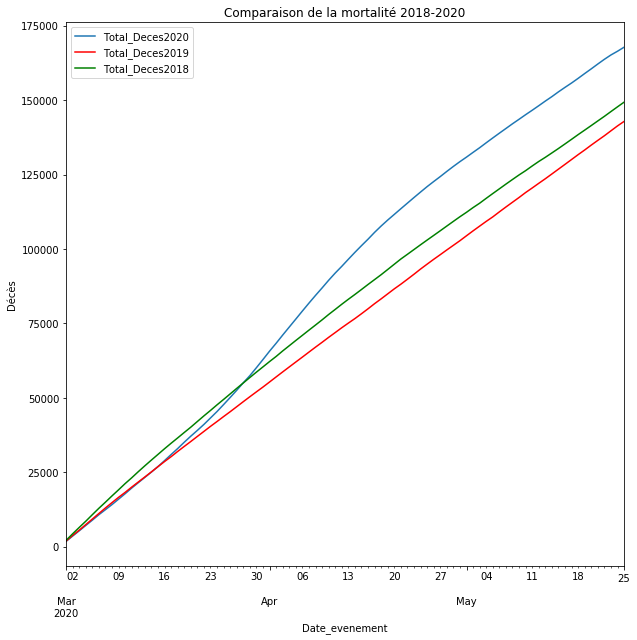

In [207]:
fig,ax = plt.subplots(1, 1, figsize = (10, 10))    #définir les axes et la taille du graphique
new_df.plot(kind='line',x='Date_evenement',y='Total_Deces2020',ax=ax)    
new_df.plot(kind='line',x='Date_evenement',y='Total_Deces2019',color='red',ax=ax)
new_df.plot(kind='line',x='Date_evenement',y='Total_Deces2018',color='green',ax=ax)
plt.ylabel('Décès')
plt.title('Comparaison de la mortalité 2018-2020')
plt.show()


On remarque une hasse remarquable dans le nombre de décès en 2020, ce qui est certainement à attribuer à l'épidémie. On s'intéresse maintenant de manière plus spécifique au nombre de décès dus au Covid-19:

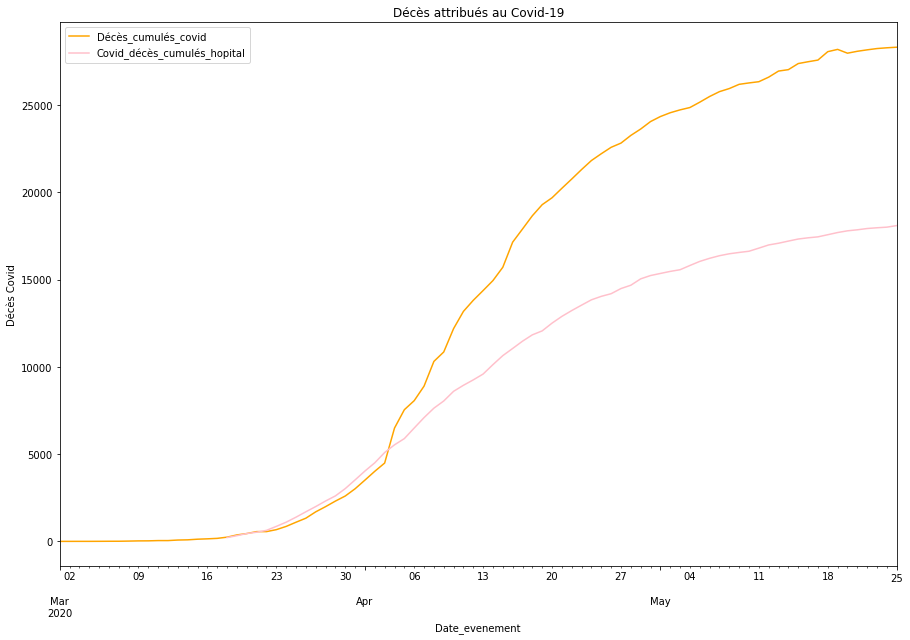

In [15]:
fig,ax = plt.subplots(1, 1, figsize = (15, 10))

new_df.plot(kind='line',x='Date_evenement',y='Décès_cumulés_covid',color='orange',ax=ax)
new_df.plot(kind='line',x='Date_evenement',y='Covid_décès_cumulés_hopital',color='pink',ax=ax)
plt.ylabel('Décès Covid')
plt.title('Décès attribués au Covid-19')

plt.show()

On remarque que le nombre de décès non survenus à l'hopital (donc à domicile et dans les maisons de retraite) semble très grand, surtout à partir de début avril. On continue notre comparaison de la mortalité en 2020 avec la mortalité des années précédentes, en effectuant une comparaison par lieu de décès.

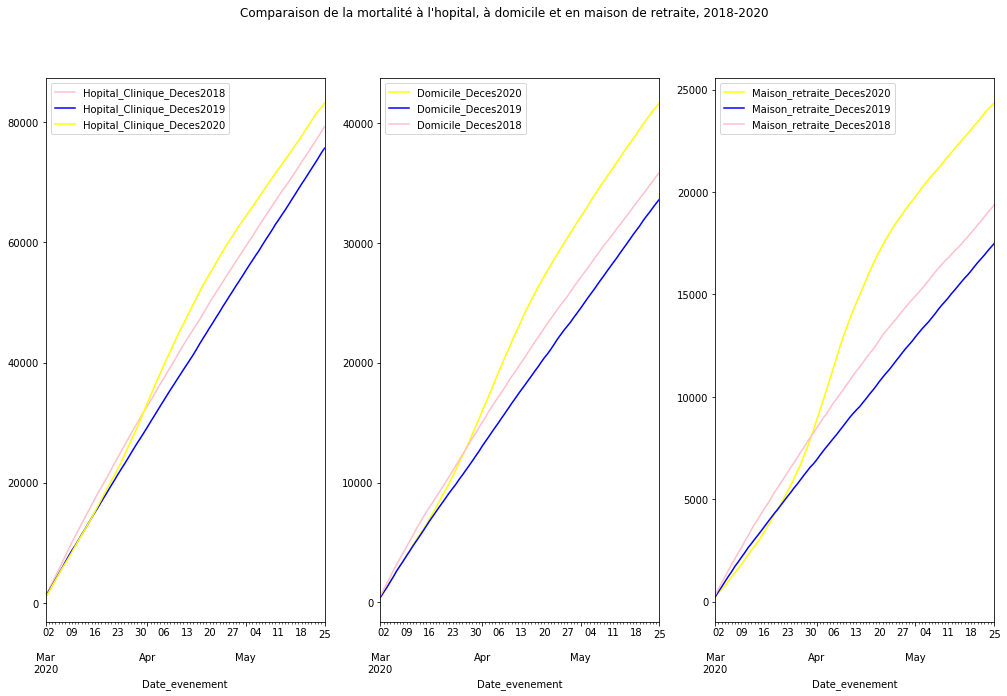

In [175]:
fig, axarr = plt.subplots(1, 3, figsize=(17, 10))

new_df.plot(kind='line',x='Date_evenement',y='Hopital_Clinique_Deces2018',color='pink',ax=axarr[0])
new_df.plot(kind='line',x='Date_evenement',y='Hopital_Clinique_Deces2019',color='blue',ax=axarr[0])
new_df.plot(kind='line',x='Date_evenement',y='Hopital_Clinique_Deces2020',color='yellow',ax=axarr[0])

new_df.plot(kind='line',x='Date_evenement',y='Domicile_Deces2020',color='yellow',ax=axarr[1])
new_df.plot(kind='line',x='Date_evenement',y='Domicile_Deces2019',color='blue',ax=axarr[1])
new_df.plot(kind='line',x='Date_evenement',y='Domicile_Deces2018',color='pink',ax=axarr[1])

new_df.plot(kind='line',x='Date_evenement',y='Maison_retraite_Deces2020',color='yellow',ax=axarr[2])
new_df.plot(kind='line',x='Date_evenement',y='Maison_retraite_Deces2019',color='blue',ax=axarr[2])
new_df.plot(kind='line',x='Date_evenement',y='Maison_retraite_Deces2018',color='pink',ax=axarr[2])

plt.suptitle("Comparaison de la mortalité à l'hopital, à domicile et en maison de retraite, 2018-2020")
plt.show()

On remarque une hausse vraiment importante dans la mortalité dans les maisons de retraite par rapport aux deux années précédentes.

# Modèle

En observant les graphiques précédents, on peut remarquer une hausse importante de la mortalité entre mars et mai 2020. Ce phénomène étant surement du à l'épidémie, on va essayer de le quantifier et donc d'évaluer une éventuelle sous-estimation de la mortalité due à la maladie.
Nous utiliserons le modéle suivant:

$$d_i^{2020} = \frac{1}{2}(d_i^{2019} + d_i^{2018}) + \beta   d_i^{covid} + \epsilon_i $$ avec:

-  $d_i^{2020}, d_i^{2019}, d_i^{2018}$ le nombre de décès totaux cumulés en 2018,2019,2020 en France, $\ i$ indiquant un jour $\ i$ entre le 18 mars et le 25 mai
-  $ d_i^{covid}$ : décès liés au Covid-19 dans la meme période
-  $\epsilon_{i}$ : bruit

J'ai élaboré ce modèle de la manière suivante: le premier terme donne une estimation de la mortalité "théorique" en 2020, c'est à dire une estimation de la mortalité si la pandémie n'avait pas eu lieu. Le deuxième terme estime la proportion de mortalité qui est à attribuer au Covid-19, $\beta$ nous permettera donc d'évaluer une éventuelle sous-estimation de la mortalité liée au Covid-19. On rajoute enfin un terme d'erreur, qu'on l'on suppose suivre une loi normale $\mathcal{N}(\ 0,\sigma^2)$.
Ce modèle est bien évidement très simpliste. Tout d'abord, on fait l'hypothèse que les décès de l'année 2020 soient (à terme d'erreur près), une moyenne des décès des années précedentes. Cependant, meme si cette hypothèse est simpliste, elle reflète un fait important, que j'ai pu vérifier en observant les données de l'INSEE sur la mortalité en France entre 1982 et 2019 (voir lien dans la section *Sitographie* de ce projet): le taux de mortalité a été très stable en France ces dernières années et on peut donc faire cette hypothèse. Deuxièmement, ce modèle part de l'hypothèse que le nombre de morts liés au Covid est fixe et il n'y a pas de données manquantes, ce qui n'est pas forcement vrai, comme l'on peut lire dans un article publié sur le blog de l'INSEE (voir *Sitographie*).

En gardant en tete ces remarques, à partir de ce modèle nous allons donc, à l'aide d'une regression, estimer le coefficient $\beta$.

 # Régression linéaire

On implemente la régression linéaire décrite dans le modèle plus haut. La variable réponse Y sera le nombre de décès en 2020 dans la période considérée et nos variables explicatives seront la mortalité "théorique" en 2020 et les décès causés par l'épidemie.

In [17]:
import numpy as np  
from sklearn.linear_model import LinearRegression

In [200]:
new_df['mortalité_2020']=1/2*(new_df['Total_Deces2018']+new_df['Total_Deces2019']) #définir une nouvelle variable dans notre
#jeu de données qui donne la mortalité théorique en 2020 (voir modèle plus haut)


In [201]:
X = new_df[['mortalité_2020','Décès_cumulés_covid']].values  #on définit X
Y = new_df['Total_Deces2020'].values      #on définit la variable Y 
reg = LinearRegression()  
reg.fit(X, Y)   #on fait une régression linéaire pour établir une relation entre la variable Y et X

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
coeff= reg.coef_       #affichier les coefficients de la régression
beta=coeff[1]               #affichier la valeur du coefficient beta
beta


0.8389118630322342

On affiche la droite de régression:

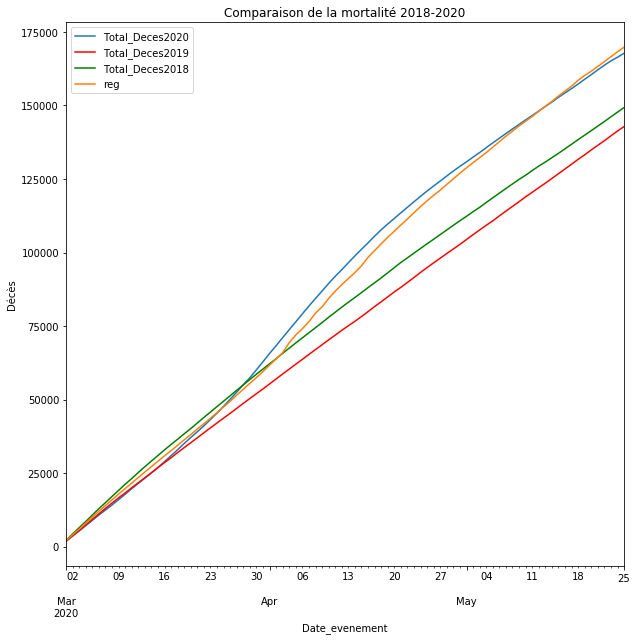

In [203]:
fig,ax = plt.subplots(1, 1, figsize = (10, 10))   
new_df.plot(kind='line',x='Date_evenement',y='Total_Deces2020',ax=ax)    
new_df.plot(kind='line',x='Date_evenement',y='Total_Deces2019',color='red',ax=ax)
new_df.plot(kind='line',x='Date_evenement',y='Total_Deces2018',color='green',ax=ax)
plt.ylabel('Décès')
plt.title('Comparaison de la mortalité 2018-2020')

new_df['reg']=new_df['mortalité_2020']+coeff[1]*new_df['Décès_cumulés_covid']
new_df.plot(kind='line',x='Date_evenement',y='reg',ax=ax)  #droite de régression
plt.show()

###  Analyse du modèle

D'après le résultat obtenu avec notre modèle, il ne semblerait pas qu'une sous-estimation du nombre de décès ait eu lieu, car le coefficient $\beta$ est très proche de 1 ($\beta$=0.8389118630322342). On va toutefois analyser plus dans le détail notre modèle, pour vérifier si il respecte bien les hypothèses d'un modèle linéaire gaussien (modèle linéaire prenant en compte des variables significatives; bruit gaussien; homoscedasticité).

**$\ R^2$ et p-value**

In [181]:
import statsmodels.formula.api as smf
results = smf.ols('Total_Deces2020 ~ mortalité_2020 + Décès_cumulés_covid', data=new_df).fit() 

print(results.summary())  #afficher détails de la regression

                            OLS Regression Results                            
Dep. Variable:        Total_Deces2020   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.689e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          4.54e-109
Time:                        20:37:15   Log-Likelihood:                -796.41
No. Observations:                  86   AIC:                             1599.
Df Residuals:                      83   BIC:                             1606.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             471.3970    

Les coefficients $\ R^2$ et $\ R^2-ajusté$ sont en fait très proches de 1, ce qui indique que le modèle est plutot bien ajusté aux données. De meme, la p-value est très petite, ce qui indique que les variables choisies sont significatives. Cependant, on remarque que l'intervalle de confiance pour $\beta$ est très grand et qu'un problème de colinearité pourrait etre présent (un modèle plus complexe, non linéaire serait probablement plus pertinent). 

**Analyse des résidus**

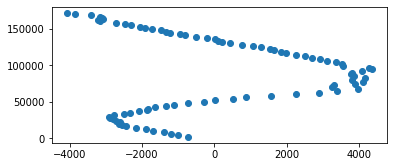

In [194]:
pred_val = results.fittedvalues.copy()
true_val = new_df['Total_Deces2020'].values.copy()
residual = true_val - pred_val      #résidus
fig, ax = plt.subplots(figsize=(6,2.5)) 
_=ax.scatter(residual, pred_val)     #representer les résidus en fonction des valeurs prédites par la regression

Les points ne sont pas repartis de manière aléatoire, on peut identifier un forme en "cone" qui indique probablèment un problème d'homoscédasticité.

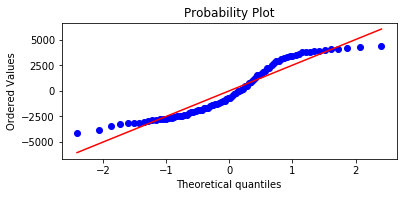

In [198]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

Les résidus sont plutot aligné le long de la droite, il semblent donc suivre une loi normale.

# Conclusion

En utilisant le modèle décrit, on a constaté qu'une sous-estimation de la mortalité liée à l'épidémie de Covid-19 ne semble pas avoir eu lieu. Cependant, après une analyse plus approfondie, notre modèle ne semble pas etre le plus robuste pour pouvoir répondre à cette question. Il serait donc intéressant de tester d'autres modèles pour répondre à la question. 

# Bases de données

- https://www.insee.fr/fr/statistiques/4487988?sommaire=4487854
- https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/
- https://covid19.who.int (cliquer sur 'download map data')

# Sitographie

- https://blog.insee.fr/statistiques-sur-les-deces-le-mode-demploi-des-donnees-de-linsee-en-7-questions-reponses/ (remarques intéressantes sur l'utilisation des données sur la mortalité en 2020)
- https://www.insee.fr/fr/statistiques/2383440#tableau-figure1 (taux de mortalité en France entre 1982 et 2019)
- https://www.lemonde.fr/international/article/2020/05/02/coronavirus-pour-estimer-le-vrai-nombre-de-morts-multiplions-les-chiffres-par-deux_6038438_3210.html (article de *Le Monde* sur la sous-estimation de la mortalité)